In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
merged_df = pd.read_csv('../../../data/plots/merged_data.csv')

In [5]:
merged_df

,CHR,POS,MRK,XtXst,C2_std,XTX_log10(1/pval),C2_log10(1/pval),fst,fet
0,21,24,1,5.946988,0.483858,1.053737,0.060084,0.009029,0.576
1,21,45,2,8.840554,0.008715,0.646328,0.005346,0.011142,1.414
2,21,51,3,7.753486,0.059778,0.777230,0.015436,0.007816,1.067
3,21,55,4,7.275984,0.019919,0.841229,0.008113,0.007468,1.398
4,21,63,5,6.113623,0.148012,1.019667,0.026425,0.006778,0.340
...,...,...,...,...,...,...,...,...,...
5282879,44,22260474,174391,37.487582,4.573860,0.643503,0.347022,0.026319,1.887
5282880,44,22260486,174392,11.747053,0.494358,0.292852,0.058563,0.016732,0.423
5282881,44,22260505,174393,10.154980,0.916128,0.437870,0.092500,0.011063,0.044
5282882,44,22260506,174394,8.288052,1.389877,0.643503,0.127949,0.015679,0.143


In [6]:
merged_df['colors'] = merged_df['CHR'].apply({
    21: 1, 22: 0, 23: 1, 24: 0, 25: 1, 26: 0, 27: 1, 28: 0,
    29: 1, 30: 0, 31: 1, 32: 0, 33: 1, 34: 0, 35: 1, 36: 0,
    37: 1, 38: 0, 39: 1, 40: 0, 41: 1, 42: 0, 43: 1, 44: 0,
}.get)

In [7]:
merged_df

,CHR,POS,MRK,XtXst,C2_std,XTX_log10(1/pval),C2_log10(1/pval),fst,fet,colors
0,21,24,1,5.946988,0.483858,1.053737,0.060084,0.009029,0.576,1
1,21,45,2,8.840554,0.008715,0.646328,0.005346,0.011142,1.414,1
2,21,51,3,7.753486,0.059778,0.777230,0.015436,0.007816,1.067,1
3,21,55,4,7.275984,0.019919,0.841229,0.008113,0.007468,1.398,1
4,21,63,5,6.113623,0.148012,1.019667,0.026425,0.006778,0.340,1
...,...,...,...,...,...,...,...,...,...,...
5282879,44,22260474,174391,37.487582,4.573860,0.643503,0.347022,0.026319,1.887,0
5282880,44,22260486,174392,11.747053,0.494358,0.292852,0.058563,0.016732,0.423,0
5282881,44,22260505,174393,10.154980,0.916128,0.437870,0.092500,0.011063,0.044,0
5282882,44,22260506,174394,8.288052,1.389877,0.643503,0.127949,0.015679,0.143,0


In [8]:
merged_df['i'] = merged_df.index

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes first
plt.figure(figsize=(20, 5))

# Plot first dataset
sns.scatterplot(data=merged_df, x='i', y='fst', hue='colors', 
                palette=["#404040", "#808080"], legend=False,
                linewidth=0, s=50, marker='o', alpha=0.6)

# Plot second dataset with different marker
sns.scatterplot(data=merged_df, x='i', y='fet', hue='colors',
                palette=["#A52A2A", "#CD5C5C"], legend=False,
                linewidth=0, s=50, marker='^', alpha=0.6)

sns.scatterplot(data=merged_df, x='i', y='XTX_log10(1/pval)', hue='colors', 
                palette=["#f686ff", "#d600e7"], legend=False,
                linewidth=0, s=50, marker='o', alpha=0.6)

# Plot second dataset with different marker
sns.scatterplot(data=merged_df, x='i', y='C2_log10(1/pval)', hue='colors',
                palette=["#95ffe2", "#00cb93"], legend=False,
                linewidth=0, s=50, marker='^', alpha=0.6)

# Get chromosome positions for x-axis labels
chrom_df = merged_df.groupby('CHR')['i'].median()

# Customize the plot
plt.xlabel('CHR')
plt.xticks(chrom_df, chrom_df.index)
plt.axhline(5, color='blue', linestyle='dashed', alpha=0.8)
plt.axhline(7.3, color='red', linestyle='dashed', alpha=0.8)
plt.ylim(4, 24)

# Add title and legend
plt.title('Combined Manhattan Plot')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#404040', 
               label='Dataset 1', markersize=8),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='#A52A2A', 
               label='Dataset 2', markersize=8)
]
plt.legend(handles=legend_elements, loc='upper right')

# Save the plot
plt.savefig('combined_manhattan_plot.jpeg', dpi=500, bbox_inches='tight')
plt.close()

c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seabo

In [23]:
# Create two y-axes for different scales
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()  # Create a second y-axis

# Plot FST on the right y-axis
sns.scatterplot(
    data=merged_df,
    x='i',
    y='fst',
    hue='colors',
    palette=color_schemes['fst']['colors'],
    legend=False,
    linewidth=0,
    s=50,
    marker=color_schemes['fst']['marker'],
    alpha=0.6,
    ax=ax2
)

# Plot other metrics on the left y-axis
for metric, params in color_schemes.items():
    if metric != 'fst':  # Skip FST as it's already plotted
        if metric == 'fet':
            y_col = 'fet'
        elif metric == 'XTX':
            y_col = 'XTX_log10(1/pval)'
        else:
            y_col = 'C2_log10(1/pval)'
            
        sns.scatterplot(
            data=merged_df,
            x='i',
            y=y_col,
            hue='colors',
            palette=params['colors'],
            legend=False,
            linewidth=0,
            s=50,
            marker=params['marker'],
            alpha=0.6,
            ax=ax1
        )

# Get chromosome positions for x-axis labels
chrom_df = merged_df.groupby('CHR')['i'].median()

# Customize the plot
ax1.set_xlabel('Chromosome', fontsize=12)
ax1.set_ylabel('-log10(p-value)', fontsize=12)
ax2.set_ylabel('FST', fontsize=12)
ax1.set_xticks(chrom_df)
ax1.set_xticklabels(chrom_df.index, fontsize=10)
plt.yticks(fontsize=10)

# Set appropriate y-axis limits
ax1.set_ylim(4, 20)
ax2.set_ylim(0, 0.45)  # Adjusted for your FST range

# Add significance thresholds
ax1.axhline(5, color='blue', linestyle='dashed', alpha=0.8, label='Suggestive')
ax1.axhline(7.3, color='red', linestyle='dashed', alpha=0.8, label='Significant')

# Create legend elements
legend_elements = []
for metric, params in color_schemes.items():
    legend_elements.append(
        plt.Line2D([0], [0], marker=params['marker'], color='w',
                   markerfacecolor=params['colors'][0], 
                   label=params['label'], markersize=8)
    )
legend_elements.extend([
    plt.Line2D([0], [0], color='blue', linestyle='dashed', label='Suggestive'),
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='Significant')
])

# Add title and legend
plt.title('Combined Manhattan Plot', fontsize=14, pad=20)
ax1.legend(handles=legend_elements, loc='upper right', framealpha=0.9, 
          edgecolor='white', fontsize=10)

# Adjust layout and save
plt.tight_layout()
plt.savefig('combined_manhattan_plot.jpeg', dpi=500, bbox_inches='tight')
plt.close()

c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seabo

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the figure and axes with better size ratio
plt.figure(figsize=(20, 8))  # Increased height for better visibility

# Define color schemes for better visualization
color_schemes = {
    # 'fst': {'colors': ["#fdff87", "#d5b800"], 'marker': 'o', 'label': 'FST'},
    # 'fet': {'colors': ["#A52A2A", "#CD5C5C"], 'marker': '^', 'label': 'FET'},
    'XTX': {'colors': ["#f686ff", "#d600e7"], 'marker': 'o', 'label': 'XTX'},
    'C2': {'colors': ["#273fd8", "#3a88c5"], 'marker': '^', 'label': 'C2'}
}

# Plot each dataset
for metric, params in color_schemes.items():
    if metric == 'fst':
        y_col = 'fst'
    elif metric == 'fet':
        y_col = 'fet'
    elif metric == 'XTX':
        y_col = 'XTX_log10(1/pval)'
    else:
        y_col = 'C2_log10(1/pval)'
        
    sns.scatterplot(
        data=merged_df,
        x='i',
        y=y_col,
        hue='colors',
        palette=params['colors'],
        legend=False,
        linewidth=0,
        s=50,
        marker=params['marker'],
        alpha=0.6
    )

# Get chromosome positions for x-axis labels
chrom_df = merged_df.groupby('CHR')['i'].median()

# Customize the plot
plt.xlabel('Chromosome', fontsize=12)
plt.ylabel('-log10(p-value)', fontsize=12)
plt.xticks(chrom_df, chrom_df.index, fontsize=10)
plt.yticks(fontsize=10)

# Add significance thresholds
# plt.axhline(5, color='blue', linestyle='dashed', alpha=0.8, label='Suggestive')
# plt.axhline(7.3, color='red', linestyle='dashed', alpha=0.8, label='Significant')
plt.ylim(0, 15)

# Create legend elements
legend_elements = []
for metric, params in color_schemes.items():
    legend_elements.append(
        plt.Line2D([0], [0], marker=params['marker'], color='w',
                   markerfacecolor=params['colors'][0], 
                   label=params['label'], markersize=8)
    )
legend_elements.extend([
    plt.Line2D([0], [0], color='blue', linestyle='dashed', label='Suggestive'),
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='Significant')
])

# Add title and legend
plt.title('Combined Manhattan Plot', fontsize=14, pad=20)
plt.legend(handles=legend_elements, loc='upper right', framealpha=0.9, 
          edgecolor='white', fontsize=10)

# Adjust layout and save
plt.tight_layout()
plt.savefig('combined_manhattan_plot.jpeg', dpi=500, bbox_inches='tight')
plt.close()

c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seabo

-----

after rerunning with resorted baypass files & removing the non common rows

In [2]:
# Load standard dataset
baypass_std = pd.read_csv('../../../data/plots/baypass/Manhattan_plot_Sparus_Baypass_dataset_filtered.csv')
baypass_c2 = pd.read_csv('../../../data/plots/baypass/C2_Manhattan_plot_Sparus_Baypass_dataset_filtered.csv')
popoolation = pd.read_csv('../../../data/plots/popoolation/Manhattan_plot_Sp_aurata_Popoolation_dataset_filtered.csv')

In [16]:
popoolation

,Unnamed: 0,CHR,BP,P_fet,i,colors
0,0,21,24,0.576,0,1
1,1,21,45,1.414,1,1
2,2,21,51,1.067,2,1
3,3,21,55,1.398,3,1
4,4,21,63,0.340,4,1
...,...,...,...,...,...,...
5282879,5300770,44,22260474,1.887,5300770,0
5282880,5300771,44,22260486,0.423,5300771,0
5282881,5300772,44,22260505,0.044,5300772,0
5282882,5300773,44,22260506,0.143,5300773,0


In [4]:
# streamline the chromosome columns to be integers
baypass_std["CHR"] = baypass_std["CHR"].str[6:].astype(int)
baypass_c2["CHR"] = baypass_c2["CHR"].str[6:].astype(int)

In [3]:
baypass_std

,CHR,BP,P,SNP,i,colors
0,LR537121,24,1.053737,1,0,1
1,LR537121,45,0.646328,2,1,1
2,LR537121,51,0.777230,3,2,1
3,LR537121,55,0.841229,4,3,1
4,LR537121,63,1.019667,5,4,1
...,...,...,...,...,...,...
5282879,LR537144,22260474,0.643503,174391,5300851,0
5282880,LR537144,22260486,0.292852,174392,5300852,0
5282881,LR537144,22260505,0.437870,174393,5300853,0
5282882,LR537144,22260506,0.643503,174394,5300854,0


In [6]:
# Save filtered data
BayPass_filtered = pd.read_csv('../../../data/plots/baypass/merged_baypass_results_filtered.csv')
C2_filtered = pd.read_csv('../../../data/plots/baypass/C2_merged_baypass_results_filtered.csv')

In [7]:
BayPass_filtered

,MRK,M_P,SD_P,M_XtX,SD_XtX,XtXst,log10(1/pval),delog_pval,log10(1/pval)_BH,chromosome,pos
0,1,0.933919,0.035384,16.262752,5.677435,5.946988,2.684962,0.002066,1.053737,21,24
1,2,0.993695,0.006925,18.139724,6.099700,8.840554,1.513754,0.030637,0.646328,21,45
2,3,0.019453,0.012698,17.202001,5.951677,7.753486,1.877920,0.013246,0.777230,21,51
3,4,0.008956,0.007391,17.682488,6.095531,7.275984,2.063166,0.008646,0.841229,21,55
4,5,0.036887,0.020909,16.569256,5.872940,6.113623,2.596923,0.002530,1.019667,21,63
...,...,...,...,...,...,...,...,...,...,...,...
5282879,174391,0.909310,0.051941,23.034086,6.128364,37.487582,1.689444,0.020444,0.643503,44,22260474
5282880,174392,0.016705,0.013169,18.412503,6.009074,11.747053,0.821064,0.150986,0.292852,44,22260486
5282881,174393,0.986422,0.014618,18.294364,6.077272,10.154980,1.158313,0.069452,0.437870,44,22260505
5282882,174394,0.017082,0.012219,17.636279,6.078215,8.288052,1.689688,0.020432,0.643503,44,22260506


In [9]:
C2_filtered

,CONTRAST,MRK,M_C2,SD_C2,C2_std,log10(1/pval),delog_pval,log10(1/pval)_BH,chromosome,pos
0,1,1,0.740179,1.049696,0.483858,0.312757,0.486680,0.060084,21,24
1,1,2,0.637535,0.915446,0.008715,0.033567,0.925620,0.005346,21,45
2,1,3,0.673391,0.968527,0.059778,0.093209,0.806847,0.015436,21,51
3,1,4,0.661905,0.931297,0.019919,0.051702,0.887765,0.008113,21,55
4,1,5,0.665275,0.962476,0.148012,0.154627,0.700443,0.026425,21,63
...,...,...,...,...,...,...,...,...,...,...
5282879,1,174391,1.846816,1.712734,4.573860,1.488607,0.032463,0.347022,44,22260474
5282880,1,174392,0.732208,1.018430,0.494358,0.316962,0.481990,0.058563,44,22260486
5282881,1,174393,0.889039,1.201577,0.916128,0.470450,0.338494,0.092500,44,22260505
5282882,1,174394,1.069129,1.411495,1.389877,0.622647,0.238426,0.127949,44,22260506


In [18]:
print(BayPass_filtered['pos'].equals(popoolation['BP']))

True


In [19]:
popoolation

,Unnamed: 0,CHR,BP,P_fet,i,colors
0,0,21,24,0.576,0,1
1,1,21,45,1.414,1,1
2,2,21,51,1.067,2,1
3,3,21,55,1.398,3,1
4,4,21,63,0.340,4,1
...,...,...,...,...,...,...
5282879,5300770,44,22260474,1.887,5300770,0
5282880,5300771,44,22260486,0.423,5300771,0
5282881,5300772,44,22260505,0.044,5300772,0
5282882,5300773,44,22260506,0.143,5300773,0


In [ ]:
merged_df = pd.DataFrame()
merged_df['CHR'] = BayPass_filtered['chromosome'] # or C2['chromosome']
merged_df['POS'] = BayPass_filtered['pos'] # or C2['pos']
merged_df['MRK'] = BayPass_filtered['MRK'] # or C2['MRK']
merged_df['XtXst'] = BayPass_filtered['XtXst']
merged_df['C2_std'] = C2_filtered['C2_std']
merged_df['XTX_log10(1/pval)'] = BayPass_filtered['log10(1/pval)']
merged_df['C2_log10(1/pval)'] = C2_filtered['log10(1/pval)']

In [20]:
# TODO - move the above code to remove_extra_rows.ipynb and rename file to remove_extra_rows_and_merge.ipynb

---------------------

In [2]:
BayPass_sparus_result=pd.read_csv("../../../data/plots/baypass/merged_baypass_results.csv", sep=",")

In [3]:
BayPass_sparus_result

,MRK,M_P,SD_P,M_XtX,SD_XtX,XtXst,log10(1/pval),delog_pval,log10(1/pval)_BH,chromosome,pos
0,1,0.933919,0.035384,16.262752,5.677435,5.946988,2.684962,0.002066,1.053737,LR537121,24
1,2,0.993695,0.006925,18.139724,6.099700,8.840554,1.513754,0.030637,0.646328,LR537121,45
2,3,0.019453,0.012698,17.202001,5.951677,7.753486,1.877920,0.013246,0.777230,LR537121,51
3,4,0.008956,0.007391,17.682488,6.095531,7.275984,2.063166,0.008646,0.841229,LR537121,55
4,5,0.036887,0.020909,16.569256,5.872940,6.113623,2.596923,0.002530,1.019667,LR537121,63
...,...,...,...,...,...,...,...,...,...,...,...
5300851,174391,0.909310,0.051941,23.034086,6.128364,37.487582,1.689444,0.020444,0.643503,LR537144,22260474
5300852,174392,0.016705,0.013169,18.412503,6.009074,11.747053,0.821064,0.150986,0.292852,LR537144,22260486
5300853,174393,0.986422,0.014618,18.294364,6.077272,10.154980,1.158313,0.069452,0.437870,LR537144,22260505
5300854,174394,0.017082,0.012219,17.636279,6.078215,8.288052,1.689688,0.020432,0.643503,LR537144,22260506


In [59]:
C2 = pd.read_csv('../../../data/plots/baypass/C2_merged_baypass_results.csv')

In [60]:
BayPass_sparus_result["chromosome"] = BayPass_sparus_result["chromosome"].str[6:].astype(int)
C2["chromosome"] = C2["chromosome"].str[6:].astype(int)

In [14]:
C2

,CONTRAST,MRK,M_C2,SD_C2,C2_std,log10(1/pval),delog_pval,log10(1/pval)_BH,chromosome,pos
0,1,1,0.740179,1.049696,0.483858,0.312757,0.486680,0.060084,21,24
1,1,2,0.637535,0.915446,0.008715,0.033567,0.925620,0.005346,21,45
2,1,3,0.673391,0.968527,0.059778,0.093209,0.806847,0.015436,21,51
3,1,4,0.661905,0.931297,0.019919,0.051702,0.887765,0.008113,21,55
4,1,5,0.665275,0.962476,0.148012,0.154627,0.700443,0.026425,21,63
...,...,...,...,...,...,...,...,...,...,...
5300851,1,174391,1.846816,1.712734,4.573860,1.488607,0.032463,0.347022,44,22260474
5300852,1,174392,0.732208,1.018430,0.494358,0.316962,0.481990,0.058563,44,22260486
5300853,1,174393,0.889039,1.201577,0.916128,0.470450,0.338494,0.092500,44,22260505
5300854,1,174394,1.069129,1.411495,1.389877,0.622647,0.238426,0.127949,44,22260506


In [15]:
BayPass_sparus_result

,MRK,M_P,SD_P,M_XtX,SD_XtX,XtXst,log10(1/pval),delog_pval,log10(1/pval)_BH,chromosome,pos
0,1,0.933919,0.035384,16.262752,5.677435,5.946988,2.684962,0.002066,1.053737,21,24
1,2,0.993695,0.006925,18.139724,6.099700,8.840554,1.513754,0.030637,0.646328,21,45
2,3,0.019453,0.012698,17.202001,5.951677,7.753486,1.877920,0.013246,0.777230,21,51
3,4,0.008956,0.007391,17.682488,6.095531,7.275984,2.063166,0.008646,0.841229,21,55
4,5,0.036887,0.020909,16.569256,5.872940,6.113623,2.596923,0.002530,1.019667,21,63
...,...,...,...,...,...,...,...,...,...,...,...
5300851,174391,0.909310,0.051941,23.034086,6.128364,37.487582,1.689444,0.020444,0.643503,44,22260474
5300852,174392,0.016705,0.013169,18.412503,6.009074,11.747053,0.821064,0.150986,0.292852,44,22260486
5300853,174393,0.986422,0.014618,18.294364,6.077272,10.154980,1.158313,0.069452,0.437870,44,22260505
5300854,174394,0.017082,0.012219,17.636279,6.078215,8.288052,1.689688,0.020432,0.643503,44,22260506


## Create merged Xtx (XtXst + log10(1/pval) and C2 (C2_std + log10(1/pval) (keep common columns: MRK, CHR, POS)

In [ ]:
merged_Xtx_C2 = pd.DataFrame()
merged_Xtx_C2['CHR'] = BayPass_sparus_result['chromosome'] # or C2['chromosome']
merged_Xtx_C2['POS'] = BayPass_sparus_result['pos'] # or C2['pos']
merged_Xtx_C2['MRK'] = BayPass_sparus_result['MRK'] # or C2['MRK']
merged_Xtx_C2['XtXst'] = BayPass_sparus_result['XtXst']
merged_Xtx_C2['C2_std'] = C2['C2_std']
merged_Xtx_C2['XTX_log10(1/pval)'] = BayPass_sparus_result['log10(1/pval)']
merged_Xtx_C2['C2_log10(1/pval)'] = C2['log10(1/pval)']

## Add Popoolation data

In [29]:
merged_Xtx_C2

,CHR,POS,MRK,XtXst,C2_std,XTX_log10(1/pval),C2_log10(1/pval)
0,21,24,1,5.946988,0.483858,2.684962,0.312757
1,21,45,2,8.840554,0.008715,1.513754,0.033567
2,21,51,3,7.753486,0.059778,1.877920,0.093209
3,21,55,4,7.275984,0.019919,2.063166,0.051702
4,21,63,5,6.113623,0.148012,2.596923,0.154627
...,...,...,...,...,...,...,...
5300851,44,22260474,174391,37.487582,4.573860,1.689444,1.488607
5300852,44,22260486,174392,11.747053,0.494358,0.821064,0.316962
5300853,44,22260505,174393,10.154980,0.916128,1.158313,0.470450
5300854,44,22260506,174394,8.288052,1.389877,1.689688,0.622647


In [62]:
popoolation_df = pd.read_csv("../../../data/popoolation_output/merged_Sparus_popoolation_results.csv", sep=",")

In [63]:
popoolation_df2 = pd.read_csv("../../../data/popoolation_output/Manhattan_plot_Sp_aurata_Popoolation_dataset.csv", sep=",")

In [77]:
popoolation_df

,Fst,index1,1,0,FET_AVG_BHcor
0,0.009029,0,24,21,0.576
1,0.011142,1,45,21,1.414
2,0.007816,2,51,21,1.067
3,0.007468,3,55,21,1.398
4,0.006778,4,63,21,0.340
...,...,...,...,...,...
5300770,0.026319,174390,22260474,44,1.887
5300771,0.016732,174391,22260486,44,0.423
5300772,0.011063,174392,22260505,44,0.044
5300773,0.015679,174393,22260506,44,0.143


In [76]:
popoolation_df2

,Unnamed: 0,CHR,BP,P_fet,i,colors
0,0,21,24,0.576,0,1
1,1,21,45,1.414,1,1
2,2,21,51,1.067,2,1
3,3,21,55,1.398,3,1
4,4,21,63,0.340,4,1
...,...,...,...,...,...,...
5300770,5300770,44,22260474,1.887,5300770,0
5300771,5300771,44,22260486,0.423,5300771,0
5300772,5300772,44,22260505,0.044,5300772,0
5300773,5300773,44,22260506,0.143,5300773,0


In [75]:
popoolation_df = popoolation_df[popoolation_df['1'].isin(merged_Xtx_C2['POS'])]
popoolation_df2 = popoolation_df2[popoolation_df2['BP'].isin(merged_Xtx_C2['POS'])]

In [ ]:
popoolation_df2

In [78]:
filtered_baypass_df = merged_Xtx_C2[merged_Xtx_C2['POS'].isin(popoolation_df2['BP'])]

In [44]:
merged_Xtx_C2.drop(columns=['Fst'], inplace=True)
merged_Xtx_C2.drop(columns=['FET_AVG_BHcor'], inplace=True)

In [79]:
filtered_baypass_df

,CHR,POS,MRK,XtXst,C2_std,XTX_log10(1/pval),C2_log10(1/pval),Fst,FET_AVG_BHcor
0,21,24,1,5.946988,0.483858,2.684962,0.312757,0.009029,0.576
1,21,45,2,8.840554,0.008715,1.513754,0.033567,0.011142,1.414
2,21,51,3,7.753486,0.059778,1.877920,0.093209,0.007816,1.067
3,21,55,4,7.275984,0.019919,2.063166,0.051702,0.007468,1.398
4,21,63,5,6.113623,0.148012,2.596923,0.154627,0.006778,0.340
...,...,...,...,...,...,...,...,...,...
5300851,44,22260474,174391,37.487582,4.573860,1.689444,1.488607,NaN,NaN
5300852,44,22260486,174392,11.747053,0.494358,0.821064,0.316962,NaN,NaN
5300853,44,22260505,174393,10.154980,0.916128,1.158313,0.470450,NaN,NaN
5300854,44,22260506,174394,8.288052,1.389877,1.689688,0.622647,NaN,NaN


In [69]:
merged_Xtx_C2['Fst'] = popoolation_df['Fst']
merged_Xtx_C2['FET_AVG_BHcor'] = popoolation_df['FET_AVG_BHcor']

In [70]:
merged_Xtx_C2

,CHR,POS,MRK,XtXst,C2_std,XTX_log10(1/pval),C2_log10(1/pval),Fst,FET_AVG_BHcor
0,21,24,1,5.946988,0.483858,2.684962,0.312757,0.009029,0.576
1,21,45,2,8.840554,0.008715,1.513754,0.033567,0.011142,1.414
2,21,51,3,7.753486,0.059778,1.877920,0.093209,0.007816,1.067
3,21,55,4,7.275984,0.019919,2.063166,0.051702,0.007468,1.398
4,21,63,5,6.113623,0.148012,2.596923,0.154627,0.006778,0.340
...,...,...,...,...,...,...,...,...,...
5300851,44,22260474,174391,37.487582,4.573860,1.689444,1.488607,NaN,NaN
5300852,44,22260486,174392,11.747053,0.494358,0.821064,0.316962,NaN,NaN
5300853,44,22260505,174393,10.154980,0.916128,1.158313,0.470450,NaN,NaN
5300854,44,22260506,174394,8.288052,1.389877,1.689688,0.622647,NaN,NaN


In [40]:
merged_Xtx_C2.to_csv('../../../data/plots/baypass/merged_Xtx_C2.csv', index=False)

In [4]:
BayPass_sparus_result.describe()

,MRK,M_P,SD_P,M_XtX,SD_XtX,XtXst,log10(1/pval),delog_pval,log10(1/pval)_BH,pos
count,5.300856e+06,5.300856e+06,5.300856e+06,5.300856e+06,5.300856e+06,5.300856e+06,5.300856e+06,5.300856e+06,5.300856e+06,5.300856e+06
mean,1.115656e+05,4.998574e-01,4.824592e-02,1.998239e+01,5.997649e+00,2.000000e+01,7.308498e-01,3.852565e-01,2.965827e-01,1.754344e+07
std,6.574713e+04,3.847911e-01,2.166925e-02,2.160776e+00,3.132990e-01,9.043410e+00,7.647650e-01,3.094049e-01,3.395702e-01,1.151574e+07
min,1.000000e+00,2.468000e-04,1.262400e-04,1.311682e+01,4.473041e+00,3.358112e-01,6.000000e-08,2.220446e-17,6.000000e-08,2.400000e+01
25%,5.521800e+04,8.457854e-02,3.119249e-02,1.849219e+01,5.800120e+00,1.332909e+01,1.888029e-01,9.232580e-02,6.236654e-02,6.426670e+06
50%,1.104350e+05,4.997904e-01,4.561648e-02,1.967809e+01,6.002975e+00,1.873148e+01,4.822401e-01,3.294275e-01,1.781362e-01,1.756692e+07
75%,1.656520e+05,9.152593e-01,6.601953e-02,2.112727e+01,6.179554e+00,2.517564e+01,1.034677e+00,6.474364e-01,4.290205e-01,2.797749e+07
max,2.762580e+05,9.996742e-01,1.116227e-01,1.594844e+02,1.823456e+01,5.922351e+02,1.665356e+01,9.999999e-01,1.189813e+01,4.139248e+07


In [ ]:
# Create merged file from XtXst and C2 results with:
# - CHR
# - BP


In [5]:
# plt.rcParams['path.simplify_threshold'] = 0.5  # Increase this value to simplify more aggressively
plt.rcParams['agg.path.chunksize'] = 10000  # Set this to a value greater than the number of points in each segment of your plot


In [6]:
plt.rcParams['agg.path.chunksize'] = 101

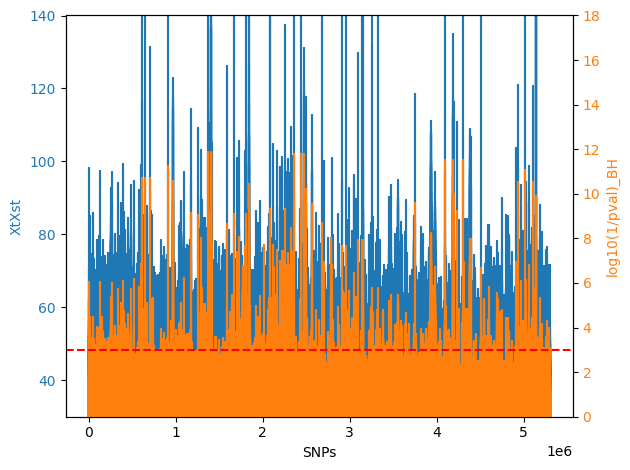

<Figure size 1000x1000 with 0 Axes>

In [7]:
data1 = BayPass_sparus_result["XtXst"]
data2 = BayPass_sparus_result["log10(1/pval)_BH"]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('SNPs')
ax1.set_ylabel('XtXst', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(30,140)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('log10(1/pval)_BH', color=color) 
ax2.plot(data2, color=color)
plt.axhline(3, color = 'red',linestyle='dashed' )
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,18)

plt.figure(figsize=(10, 10))
fig.tight_layout() 
plt.show()

# ERROR SHOWING: 
# OverflowError: Exceeded cell block limit in Agg. Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

In [25]:
# ============= create the MANHATTAN PLOT ============= #

# build the dataframe to be used for the construction of the manhattan plot
manhattan_df1 = pd.DataFrame()
manhattan_df1["CHR"] = BayPass_sparus_result["chromosome"]
manhattan_df1["BP"] = BayPass_sparus_result["pos"]
manhattan_df1["P"] = BayPass_sparus_result["log10(1/pval)_BH"]
manhattan_df1["SNP"] = BayPass_sparus_result["MRK"]
manhattan_df1['i'] = manhattan_df1.index
# resort each chromosome baypass file according to pos

# + run baypass with a corrected file for a chromosome with the smallest file and compare results




In [26]:
C2_manhattan_df = pd.DataFrame()
C2_manhattan_df["CHR"] = C2["chromosome"]
C2_manhattan_df["BP"] = C2["pos"]
C2_manhattan_df["P"] = C2["log10(1/pval)_BH"]
C2_manhattan_df["SNP"] = C2["MRK"]
C2_manhattan_df['i'] = C2_manhattan_df.index

In [27]:
manhattan_df2 = manhattan_df1['CHR']
manhattan_df2 = pd.DataFrame(data=manhattan_df2)
manhattan_df2


manhattan_df2['CHR'] = manhattan_df2['CHR'].apply({
    'LR537121': 1, 'LR537122': 0, 'LR537123': 1, 'LR537124': 0,
    'LR537125': 1, 'LR537126': 0, 'LR537127': 1, 'LR537128': 0,
    'LR537129': 1, 'LR537130': 0, 'LR537131': 1, 'LR537132': 0,
    'LR537133': 1, 'LR537134': 0, 'LR537135': 1, 'LR537136': 0,
    'LR537137': 1, 'LR537138': 0, 'LR537139': 1, 'LR537140': 0,
    'LR537141': 1, 'LR537142': 0, 'LR537143': 1, 'LR537144': 0
}.get)

manhattan_df1['colors'] = manhattan_df2
manhattan_df1

,CHR,BP,P,SNP,i,colors
0,21,24,1.053737,1,0,None
1,21,45,0.646328,2,1,None
2,21,51,0.777230,3,2,None
3,21,55,0.841229,4,3,None
4,21,63,1.019667,5,4,None
...,...,...,...,...,...,...
5300851,44,22260474,0.643503,174391,5300851,None
5300852,44,22260486,0.292852,174392,5300852,None
5300853,44,22260505,0.437870,174393,5300853,None
5300854,44,22260506,0.643503,174394,5300854,None


In [28]:
C2_final_manhattan_df = C2_manhattan_df['CHR']
C2_final_manhattan_df = pd.DataFrame(data=C2_final_manhattan_df)
C2_final_manhattan_df


C2_final_manhattan_df['CHR'] = C2_final_manhattan_df['CHR'].apply({
    'LR537121': 1, 'LR537122': 0, 'LR537123': 1, 'LR537124': 0,
    'LR537125': 1, 'LR537126': 0, 'LR537127': 1, 'LR537128': 0,
    'LR537129': 1, 'LR537130': 0, 'LR537131': 1, 'LR537132': 0,
    'LR537133': 1, 'LR537134': 0, 'LR537135': 1, 'LR537136': 0,
    'LR537137': 1, 'LR537138': 0, 'LR537139': 1, 'LR537140': 0,
    'LR537141': 1, 'LR537142': 0, 'LR537143': 1, 'LR537144': 0
}.get)

C2_manhattan_df['colors'] = C2_final_manhattan_df
C2_manhattan_df

,CHR,BP,P,SNP,i,colors
0,21,24,0.060084,1,0,None
1,21,45,0.005346,2,1,None
2,21,51,0.015436,3,2,None
3,21,55,0.008113,4,3,None
4,21,63,0.026425,5,4,None
...,...,...,...,...,...,...
5300851,44,22260474,0.347022,174391,5300851,None
5300852,44,22260486,0.058563,174392,5300852,None
5300853,44,22260505,0.092500,174393,5300853,None
5300854,44,22260506,0.127949,174394,5300854,None


In [27]:
C2_manhattan_df.to_csv(r"../../../data/plots/baypass/C2_Manhattan_plot_Sparus_Baypass_dataset.csv", index=False)

In [3]:
manhattan_df1.to_csv(r"../../../data/plots/baypass/Manhattan_plot_Sparus_Baypass_dataset.csv", index=False)

NameError: name 'manhattan_df1' is not defined

In [4]:
C2_manhattan_df = pd.read_csv(r"../../../data/plots/baypass/C2_Manhattan_plot_Sparus_Baypass_dataset.csv")

In [5]:
manhattan_df1=pd.read_csv(r"../../../data/plots/baypass/Manhattan_plot_Sparus_Baypass_dataset.csv")

In [6]:
manhattan_df1

,CHR,BP,P,SNP,i,colors
0,LR537121,24,1.053737,1,0,1
1,LR537121,45,0.646328,2,1,1
2,LR537121,51,0.777230,3,2,1
3,LR537121,55,0.841229,4,3,1
4,LR537121,63,1.019667,5,4,1
...,...,...,...,...,...,...
5300851,LR537144,22260474,0.643503,174391,5300851,0
5300852,LR537144,22260486,0.292852,174392,5300852,0
5300853,LR537144,22260505,0.437870,174393,5300853,0
5300854,LR537144,22260506,0.643503,174394,5300854,0


In [7]:
C2_manhattan_df

,CHR,BP,P,SNP,i,colors
0,LR537121,24,0.060084,1,0,1
1,LR537121,45,0.005346,2,1,1
2,LR537121,51,0.015436,3,2,1
3,LR537121,55,0.008113,4,3,1
4,LR537121,63,0.026425,5,4,1
...,...,...,...,...,...,...
5300851,LR537144,22260474,0.347022,174391,5300851,0
5300852,LR537144,22260486,0.058563,174392,5300852,0
5300853,LR537144,22260505,0.092500,174393,5300853,0
5300854,LR537144,22260506,0.127949,174394,5300854,0


c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seabo

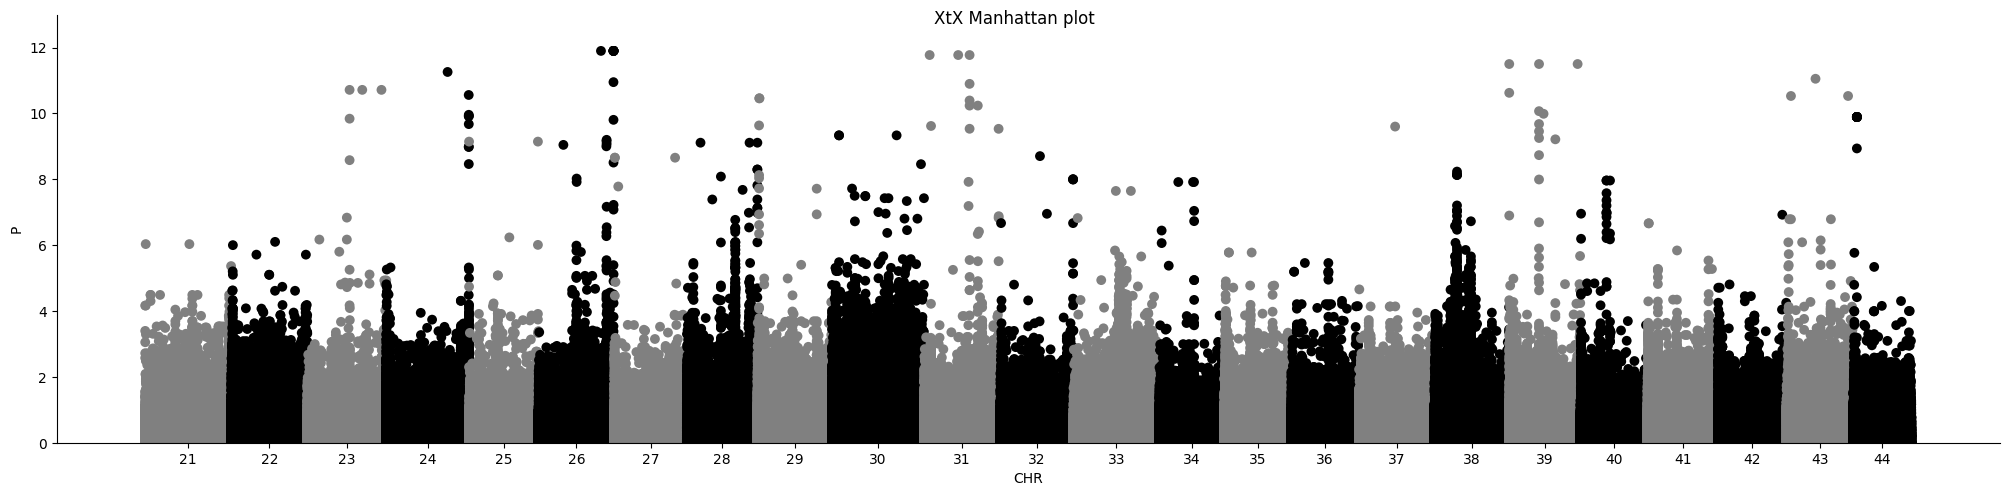

In [33]:
# Generate Manhattan plot: 
plot = sns.relplot(data=manhattan_df1, x='i', y='P', hue='colors', palette = ["black", "grey"], 
                   legend=None ,aspect=4, linewidth=0, s=50)

# Convert CHR to categorical if it isn't already
manhattan_df1['CHR'] = pd.Categorical(manhattan_df1['CHR'])
chrom_df= manhattan_df1.groupby('CHR')['i'].median()

plot.ax.set_xlabel('CHR')
plot.ax.set_xticks(chrom_df)
plot.ax.set_xticklabels(chrom_df.index)
# plt.axhline(5, color = 'blue',linestyle='dashed')
# plt.axhline(7.3, color = 'red',linestyle='dashed')
plt.ylim(0,13)
plot.fig.suptitle('XtX Manhattan plot')

plt.savefig('corrected_pvalues_manhattan_plot_Baypass.jpeg', dpi=500)

FOR C2:

iplots

c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seabo

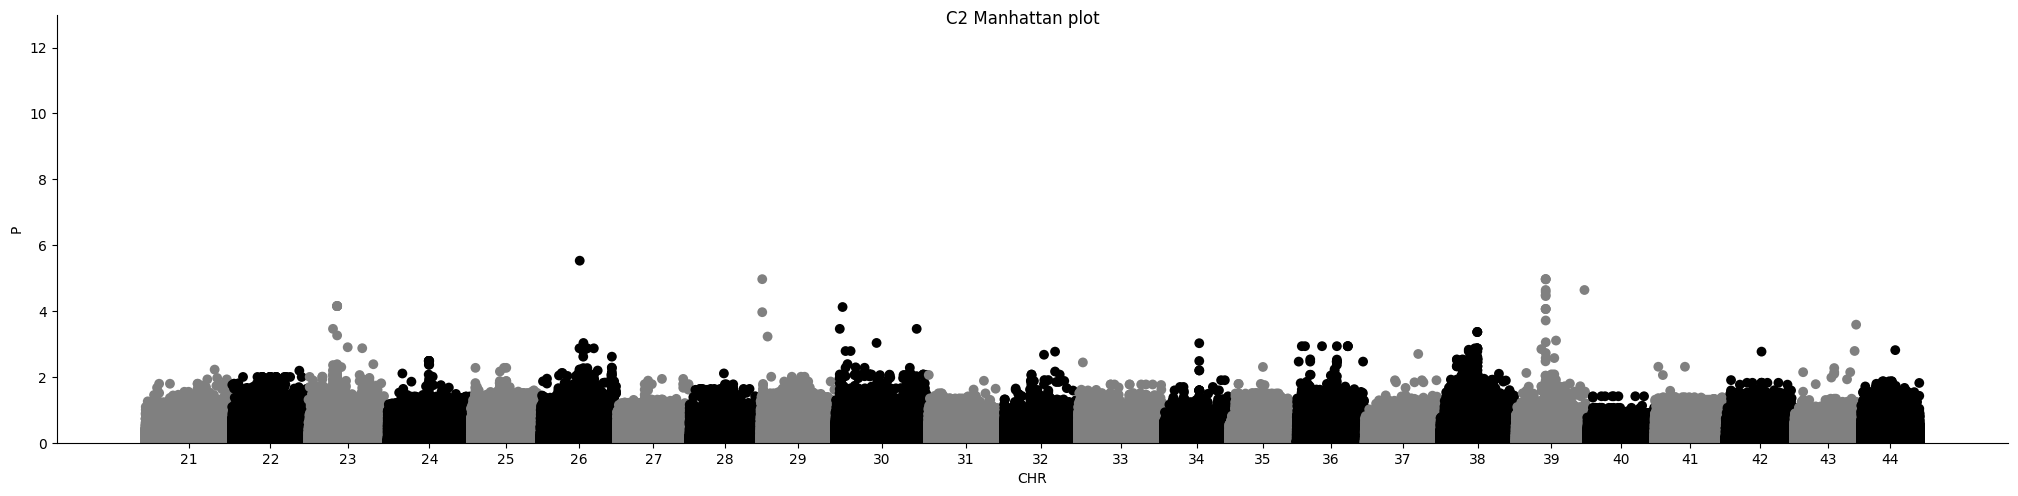

In [32]:
# Generate Manhattan plot: 
plot = sns.relplot(data=C2_manhattan_df, x='i', y='P', hue='colors', palette = ["black", "grey"], legend=None ,aspect=4, linewidth=0, s=50)
chrom_df= C2_manhattan_df.groupby('CHR')['i'].median()
plot.ax.set_xlabel('CHR')
plot.ax.set_xticks(chrom_df)
plot.ax.set_xticklabels(chrom_df.index)
# plt.axhline(5, color = 'blue',linestyle='dashed')
# plt.axhline(7.3, color = 'red',linestyle='dashed')
plt.ylim(0,13)
plot.fig.suptitle('C2 Manhattan plot')

plt.savefig('corrected_pvalues_manhattan_plot_Baypass.jpeg', dpi=600)

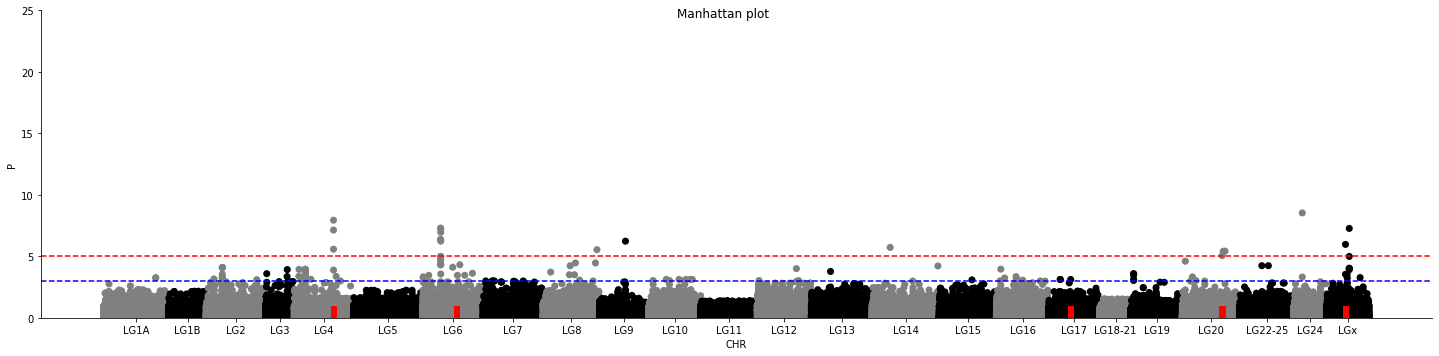

In [21]:
# Generate Manhattan plot: 
plot = sns.relplot(data=manhattan_df1, x='i', y='P', hue='colors', palette = ["black", "grey"], 
                   legend=None ,aspect=4, linewidth=0, s=50)
chrom_df= manhattan_df1.groupby('CHR')['i'].median()
plot.ax.set_xlabel('CHR'); plot.ax.set_xticks(chrom_df);
plot.ax.set_xticklabels(chrom_df.index)
plt.axhline(3, color = 'blue',linestyle='dashed')
plt.axhline(5, color = 'red',linestyle='dashed')
plt.vlines(x = 107631, ymin = 0, ymax = 1, color = 'red', linewidth = 6)  # genes in LG4
plt.vlines(x = 165795, ymin = 0, ymax = 1, color = 'red', linewidth = 6)  # genes in LG6
plt.vlines(x = 453620, ymin = 0, ymax = 1, color = 'red', linewidth = 6)  # genes in LG17
plt.vlines(x = 524671, ymin = 0, ymax = 1, color = 'red', linewidth = 6)  # genes in LG20
plt.vlines(x = 525196, ymin = 0, ymax = 1, color = 'red', linewidth = 6)  # genes in LG20
plt.vlines(x = 582577, ymin = 0, ymax = 1, color = 'red', linewidth = 6)  # genes in LG
plt.ylim(0, 25)
plot.fig.suptitle('Manhattan plot');

plt.savefig('corrected_pvalues_manhattan_plot_Baypass_with_genes.jpeg', dpi=500)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes first
plt.figure(figsize=(20, 5))

# Plot first dataset
sns.scatterplot(data=manhattan_df1, x='i', y='P', hue='colors', 
                palette=["#404040", "#808080"], legend=False,
                linewidth=0, s=50, marker='o', alpha=0.6)

# Plot second dataset with different marker
sns.scatterplot(data=C2_manhattan_df, x='i', y='P', hue='colors',
                palette=["#A52A2A", "#CD5C5C"], legend=False,
                linewidth=0, s=50, marker='^', alpha=0.6)

# Get chromosome positions for x-axis labels
chrom_df = manhattan_df1.groupby('CHR')['i'].median()

# Customize the plot
plt.xlabel('CHR')
plt.xticks(chrom_df, chrom_df.index)
plt.axhline(5, color='blue', linestyle='dashed', alpha=0.8)
plt.axhline(7.3, color='red', linestyle='dashed', alpha=0.8)
plt.ylim(0, 20)

# Add title and legend
plt.title('Combined Manhattan Plot')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#404040', 
               label='Dataset 1', markersize=8),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='#A52A2A', 
               label='Dataset 2', markersize=8)
]
plt.legend(handles=legend_elements, loc='upper right')

# Save the plot
plt.savefig('combined_manhattan_plot.jpeg', dpi=500, bbox_inches='tight')
plt.close()

c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seabo

In [29]:
# 1. Basic approach - find values above your significance threshold
significant_snps = manhattan_df1[manhattan_df1['P'] > 8].sort_values('P', ascending=False)
# Print top peaks
print("Top significant SNPs:")
print(significant_snps[['CHR', 'i', 'P', 'pos']].head())

# 2. More sophisticated approach - find local maxima
from scipy.signal import find_peaks

# Group by chromosome to find peaks within each chromosome
def find_chromosome_peaks(chrom_data, height_threshold=10, distance=100):
    peaks, _ = find_peaks(chrom_data['P'].values, height=height_threshold, distance=distance)
    return chrom_data.iloc[peaks]

# Apply peak finding to each chromosome
peak_results = []
for chrom, data in manhattan_df1.groupby('CHR'):
    peaks = find_chromosome_peaks(data)
    peak_results.append(peaks)

# Combine all peaks
all_peaks = pd.concat(peak_results)
all_peaks = all_peaks.sort_values('P', ascending=False)

# Print top peaks with more information
print("\nTop peaks by chromosome:")
print(all_peaks[['CHR', 'i', 'P', 'pos']].head(50))


Top significant SNPs:
              CHR        i          P      pos
5137636  LR537144  5137636  12.366268  2130489
5137601  LR537144  5137601  12.366268  2130140
5137597  LR537144  5137597  12.366268  2130124
5137598  LR537144  5137598  12.366268  2130133
5137600  LR537144  5137600  12.366268  2130138

Top peaks by chromosome:
              CHR        i          P       pos
5137636  LR537144  5137636  12.366268   2130489
1405699  LR537126  1405699  12.199163  39755019
1405821  LR537126  1405821  12.199163  39761469
1367986  LR537126  1367986  12.199163  33575116
1405530  LR537126  1405530  12.199163  39742164
3145200  LR537134  3145200  11.841581  16942826
3148062  LR537134  3148062  11.841581  17401955
3100857  LR537134  3100857  11.841581   6537708
3321085  LR537135  3321085  11.825321  12682494
3252713  LR537135  3252713  11.825321   2782831
1666781  LR537128  1666781  11.805100   3678902
1813953  LR537128  1813953  11.805100  32894608
1837468  LR537128  1837468  11.805100  3695765

In [60]:
manhattan_df1['pos'] = BayPass_sparus_result['pos']

c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seabo

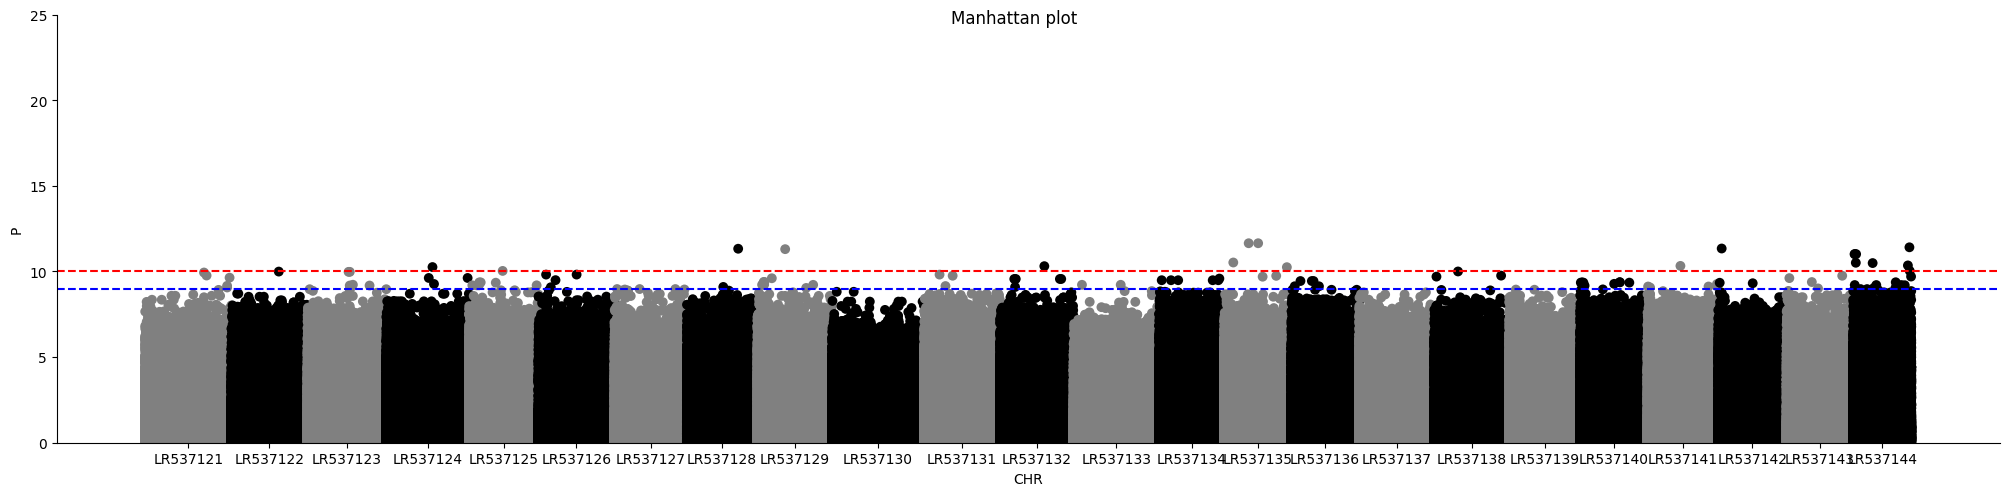

In [62]:
# Generate Manhattan plot: 
plot = sns.relplot(data=manhattan_df1, x='i', y='P', hue='colors', palette = ["black", "grey"], 
                   legend=None ,aspect=4, linewidth=0, s=50)
chrom_df= manhattan_df1.groupby('CHR')['i'].median()
plot.ax.set_xlabel('CHR'); plot.ax.set_xticks(chrom_df);
plot.ax.set_xticklabels(chrom_df.index)
plt.axhline(9, color = 'blue',linestyle='dashed')
plt.axhline(10, color = 'red',linestyle='dashed')
plt.ylim(0,25)
plot.fig.suptitle('Manhattan plot');

plt.savefig('corrected_pvalues_manhattan_plot_Baypass.jpeg', dpi=500)

In [29]:
C2_manhattan_df

,CHR,BP,P,SNP,i,colors
0,21,24,0.060084,1,0,None
1,21,45,0.005346,2,1,None
2,21,51,0.015436,3,2,None
3,21,55,0.008113,4,3,None
4,21,63,0.026425,5,4,None
...,...,...,...,...,...,...
5300851,44,22260474,0.347022,174391,5300851,None
5300852,44,22260486,0.058563,174392,5300852,None
5300853,44,22260505,0.092500,174393,5300853,None
5300854,44,22260506,0.127949,174394,5300854,None


In [34]:
# Make this column numeric from string
manhattan_df1['CHR'] = manhattan_df1['CHR'].astype(int)

In [35]:
manhattan_df1

,CHR,BP,P,SNP,i,colors
0,21,24,1.053737,1,0,None
1,21,45,0.646328,2,1,None
2,21,51,0.777230,3,2,None
3,21,55,0.841229,4,3,None
4,21,63,1.019667,5,4,None
...,...,...,...,...,...,...
5300851,44,22260474,0.643503,174391,5300851,None
5300852,44,22260486,0.292852,174392,5300852,None
5300853,44,22260505,0.437870,174393,5300853,None
5300854,44,22260506,0.643503,174394,5300854,None


In [20]:
# add a columnn named GENE with the gene names:
manhattan_df1['GENE'] = ['LOC' + str(i) for i in range(1, len(manhattan_df1) + 1)] 

In [2]:
import pandas as pd
import dash_bio


df = pd.read_csv('https://raw.githubusercontent.com/plotly/dash-bio-docs-files/master/manhattan_data.csv')

In [7]:
manhattan_df1.drop(columns=['colors', 'i'], inplace=True)

NameError: name 'manhattan_df1' is not defined

In [16]:
help(dash_bio.ManhattanPlot)

Help on function ManhattanPlot in module dash_bio.component_factory._manhattan:

ManhattanPlot(dataframe, chrm='CHR', bp='BP', p='P', snp='SNP', gene='GENE', annotation=None, logp=True, title='Manhattan Plot', showgrid=True, xlabel=None, ylabel='-log10(p)', point_size=5, showlegend=True, col=None, suggestiveline_value=8.0, suggestiveline_color='#636efa', suggestiveline_width=1, genomewideline_value=7.301029995663981, genomewideline_color='#EF553B', genomewideline_width=1, highlight=True, highlight_color='red')
    Returns a figure for a manhattan plot.
    
    Keyword arguments:
    - dataframe (dataframe; required): A pandas dataframe which must contain at
        least the following three columns:
                - the chromosome number
                - genomic base-pair position
                - a numeric quantity to plot such as a p-value or zscore
    - chrm (string; default 'CHR'): A string denoting the column name for
        the chromosome. This column must be float or integ

In [ ]:
dash_bio.ManhattanPlot(
    dataframe=manhattan_df1,
    suggestiveline_color='#AA00AA',
    genomewideline_color='#AA5500',
    # yaxis={'range': [2, 13]},  # This will limit y-axis from 0 to 10
)

IndexError: index 613464 is out of bounds for axis 0 with size 19158

In [13]:
manhattan_df1["CHR"] = manhattan_df1["CHR"].str[6:]

In [17]:
# keep only the rows where the p-value is greater than 2 and less than 13
manhattan_df1 = manhattan_df1[(manhattan_df1["P"] > 2) & (manhattan_df1["P"] < 13)]

In [22]:
manhattan_df1["CHR"] = manhattan_df1["CHR"].astype(int)

In [38]:
df

,CHR,BP,P,SNP,ZSCORE,EFFECTSIZE,GENE,DISTANCE
0,1,937641,0.335344,rs9697358,0.9634,-0.0946,ISG15,1068
1,1,1136887,0.245857,rs34945898,1.1605,-0.0947,TNFRSF4,0
2,1,2116240,0.823286,rs12034613,0.2233,-0.0741,FP7162,0
3,1,2310562,0.493204,rs4648633,0.6852,0.0146,MORN1,0
4,1,2681715,0.605392,rs4430271,0.5167,0.1234,MMEL1,127427
...,...,...,...,...,...,...,...,...
14407,23,153207974,0.574920,rs766418,0.5608,-0.0190,NaN,-1
14408,23,153280339,0.978400,rs11593,0.0271,-0.1355,NaN,-1
14409,23,153546061,0.056012,rs5987005,1.9109,0.0026,NaN,-1
14410,23,153903746,0.132189,rs28370194,1.5055,-0.1425,NaN,-1


In [15]:
manhattan_df1.drop(columns=['colors', 'i'], inplace=True)

In [1]:
dash_bio.ManhattanPlot(
    dataframe=manhattan_df1,
    suggestiveline=8,  # -log10(1e-8)
    genomewideline=5,  # -log10(1e-5)
    yaxis={'range': [2, 13]},  # This will limit y-axis from 0 to 10
)

NameError: name 'dash_bio' is not defined

In [43]:
dash_bio.ManhattanPlot(
    dataframe=manhattan_df1,
)

: 

: 

In [3]:
df

,CHR,BP,P,SNP,ZSCORE,EFFECTSIZE,GENE,DISTANCE
0,1,937641,0.335344,rs9697358,0.9634,-0.0946,ISG15,1068
1,1,1136887,0.245857,rs34945898,1.1605,-0.0947,TNFRSF4,0
2,1,2116240,0.823286,rs12034613,0.2233,-0.0741,FP7162,0
3,1,2310562,0.493204,rs4648633,0.6852,0.0146,MORN1,0
4,1,2681715,0.605392,rs4430271,0.5167,0.1234,MMEL1,127427
...,...,...,...,...,...,...,...,...
14407,23,153207974,0.574920,rs766418,0.5608,-0.0190,NaN,-1
14408,23,153280339,0.978400,rs11593,0.0271,-0.1355,NaN,-1
14409,23,153546061,0.056012,rs5987005,1.9109,0.0026,NaN,-1
14410,23,153903746,0.132189,rs28370194,1.5055,-0.1425,NaN,-1


In [ ]:
from plotly.graph_objs import FigureWidget
import numpy as np
x = -2 + 5 * np.random.rand(50)
y = 3 + 4 * np.random.rand(50)

trace1 = dict(type='scatter',
              x=x,
              y=y,
              mode='markers',
            
              marker=dict(color=np.zeros(x.shape[0]),
                          colorscale=[[0, 'blue'], 
                                   [1., 'red']], 
                          size=10, 
                          showscale=False)
           )

layout = dict(width=600, 
              height=550, 
              autosize=False,
              xaxis=dict(zeroline=False),
              dragmode='lasso',
              hovermode='closest')

fw = FigureWidget(data=[trace1], layout=layout)
# The marker colorscale is defined such that the points in the scatter plot are colored blue before selection, the selected points will be red, while the unselected, blue, with a low opacity.

def brush(trace, points, state):
    inds = np.array(points.point_inds)
    if inds.size:
        selected = np.zeros(len(trace.x))
        selected[inds] = 1
        trace.marker.color = selected # now the trace marker color is a list of 0 and 1; 
                                      # we have 0 at the position of unselected
                                      # points and 1 in the position of selected points 
        
fw.data[0].on_selection(brush)   
fw
# fw.data[0].marker.color

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
fw